Epoch 1/100
19/19 - 3s - loss: 0.6926 - accuracy: 0.5615 - val_loss: 0.6947 - val_accuracy: 0.2381 - 3s/epoch - 171ms/step
Epoch 2/100
19/19 - 0s - loss: 0.6909 - accuracy: 0.5615 - val_loss: 0.7019 - val_accuracy: 0.0000e+00 - 63ms/epoch - 3ms/step
Epoch 3/100
19/19 - 0s - loss: 0.6866 - accuracy: 0.6631 - val_loss: 0.6946 - val_accuracy: 0.3810 - 72ms/epoch - 4ms/step
Epoch 4/100
19/19 - 0s - loss: 0.6794 - accuracy: 0.6898 - val_loss: 0.7024 - val_accuracy: 0.3333 - 63ms/epoch - 3ms/step
Epoch 5/100
19/19 - 0s - loss: 0.6635 - accuracy: 0.7380 - val_loss: 0.7123 - val_accuracy: 0.3333 - 63ms/epoch - 3ms/step
Epoch 6/100
19/19 - 0s - loss: 0.6385 - accuracy: 0.7166 - val_loss: 0.6783 - val_accuracy: 0.5238 - 74ms/epoch - 4ms/step
Epoch 7/100
19/19 - 0s - loss: 0.6175 - accuracy: 0.6898 - val_loss: 0.7054 - val_accuracy: 0.3810 - 63ms/epoch - 3ms/step
Epoch 8/100
19/19 - 0s - loss: 0.5684 - accuracy: 0.7273 - val_loss: 0.8987 - val_accuracy: 0.1429 - 63ms/epoch - 3ms/step
Epoch 9/100


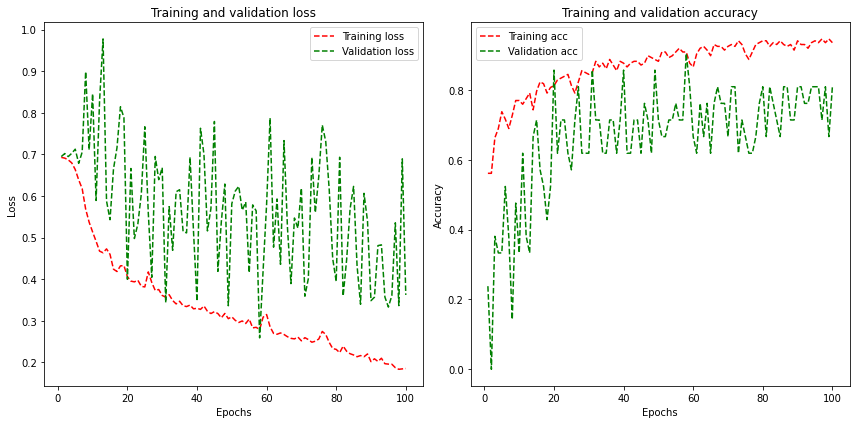

In [ ]:
import pandas as pd
import numpy as np
import tensorflow.keras
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from matplotlib import gridspec

df = pd.read_csv("sonar.csv", header=None)
dataset = df.values
X = dataset[:,0:45].astype(float)
Y = dataset[:,60]

encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

model = Sequential()
model.add(Dense(60, input_dim=45, kernel_initializer='normal', activation='relu'))
model.add(Dense(15, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
H = model.fit(X, encoded_Y, epochs=100, batch_size=10, validation_split=0.1, verbose=2)

loss = H.history['loss']
val_loss = H.history['val_loss']
acc = H.history['accuracy']
val_acc = H.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12,6))
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 3]) 
plt.subplot(gs[0])
plt.plot(epochs, loss, 'r--', label='Training loss')
plt.plot(epochs, val_loss, 'g--', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(gs[1])
plt.plot(epochs, acc, 'r--', label='Training acc')
plt.plot(epochs, val_acc, 'g--', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()